In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#Arquivo com os valores de medição do drone
file = r"C:\Users\lucas\Documents\Controle Digital\trabalho controle digital und3\drone_valores.xlsx"
df = pd.read_excel(file)
df.head()

,PID,SetPoint,Ângulo,Unnamed: 3
0,72.54,90,128.96,Contador 1
1,70.77,90,128.88,Contador 2
2,70.98,90,128.97,Contador 3
3,71.17,90,128.96,Contador 4
4,71.36,90,128.88,Contador 5


In [3]:
# Ajustando os dados
display(df)
df = df.rename(columns={'Unnamed: 3': 'Contador'})
display(df)

,PID,SetPoint,Ângulo,Unnamed: 3
0,72.54,90,128.96,Contador 1
1,70.77,90,128.88,Contador 2
2,70.98,90,128.97,Contador 3
3,71.17,90,128.96,Contador 4
4,71.36,90,128.88,Contador 5
...,...,...,...,...
1127,81.02,90,89.37,Contador 1127
1128,81.06,90,89.74,Contador 1128
1129,80.98,90,88.92,Contador 1129
1130,81.10,90,90.03,Contador 1130


,PID,SetPoint,Ângulo,Contador
0,72.54,90,128.96,Contador 1
1,70.77,90,128.88,Contador 2
2,70.98,90,128.97,Contador 3
3,71.17,90,128.96,Contador 4
4,71.36,90,128.88,Contador 5
...,...,...,...,...
1127,81.02,90,89.37,Contador 1127
1128,81.06,90,89.74,Contador 1128
1129,80.98,90,88.92,Contador 1129
1130,81.10,90,90.03,Contador 1130


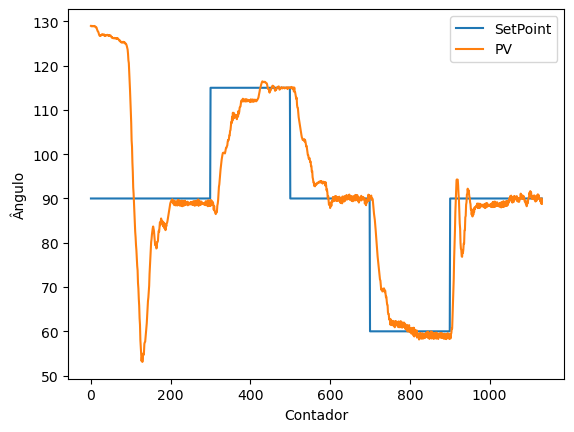

In [4]:
# Seleciona as colunas 'SetPoint' e 'Ângulo'
subset_df = df[['SetPoint', 'Ângulo']]

# Plota as colunas
plt.plot(subset_df.index, subset_df['SetPoint'], label='SetPoint')
plt.plot(subset_df.index, subset_df['Ângulo'], label='PV')

# Adiciona rótulos e legenda
plt.xlabel('Contador')
plt.ylabel('Ângulo')
plt.legend()

# Exibe o gráfico
plt.show()


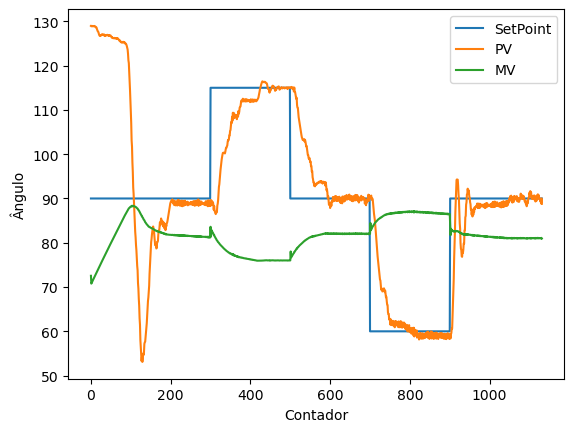

In [5]:
# Suponha que 'df' seja o seu DataFrame

# Seleciona as colunas 'SetPoint' e 'Ângulo'
subset_df = df[['SetPoint', 'Ângulo', 'PID']]

# Plota as colunas
plt.plot(subset_df.index, subset_df['SetPoint'], label='SetPoint')
plt.plot(subset_df.index, subset_df['Ângulo'], label='PV')
plt.plot(subset_df.index, subset_df['PID'], label='MV')

# Adiciona rótulos e legenda
plt.xlabel('Contador')
plt.ylabel('Ângulo')
plt.legend()

# Exibe o gráfico
plt.show()


In [6]:
# Arquivo da calibração
file2 = r"C:\Users\lucas\Documents\Controle Digital\trabalho controle digital und3\drone\drone.xlsx"
df2 = pd.read_excel(file2)
df2.head()

,Ângulo,Bit
0,142,325
1,130,351
2,120,375
3,110,400
4,100,434


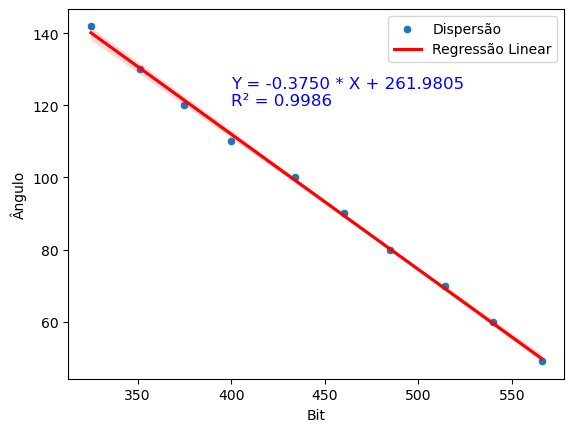

In [7]:
# Plotando o gráfico de dispersão
sns.scatterplot(x='Bit', y='Ângulo', data=df2, label='Dispersão')

# Adicionando a função de regressão linear
sns.regplot(x='Bit', y='Ângulo', data=df2, scatter=False, color='red', label='Regressão Linear')

# Calculando a regressão linear
coefficients = np.polyfit(df2['Bit'], df2['Ângulo'], 1)
equation = f'Y = {coefficients[0]:.4f} * X + {coefficients[1]:.4f}'

# Calculando o R²
y_pred = coefficients[0] * df2['Bit'] + coefficients[1]
r_squared = 1 - (sum((df2['Ângulo'] - y_pred)**2) / ((len(df2)-1) * np.var(df2['Ângulo'], ddof=1)))
r_squared = round(r_squared, 4)

# Adicionando a equação e o R² ao gráfico
plt.annotate(f'{equation}\nR² = {r_squared}', xy=(400, 120), fontsize=12, color='blue')

# Adicionando rótulos e legendas
plt.xlabel('Bit')
plt.ylabel('Ângulo')
plt.legend()

# Exibindo o gráfico
plt.show()


In [9]:
# Calcular a diferença entre Nivel e SetPoint
df['Erro'] = df['Ângulo'] - df['SetPoint']

# Calcular o MSE
mse = np.mean(df['Erro']**2)/len(df)

print(f'O MSE é: {mse:.2f}')

O MSE é: 0.18
